In [96]:
import tweepy
import time
import threading
import matplotlib.pyplot as plt
from textblob import TextBlob

In [97]:
consumer_key = "EpHfm5aHtLKncFCvlwM1UE9oR"
consumer_secret = "J9DQH8JKn3lTWOKD0Wq5vuDi0GVapcVbcGpdBMKZLuZ9bg9lJy"
access_token = "1045732419968454656-X9awIZWJjETNH4q8TvpRrxiJjiMCwq"
access_token_secret = "uKrDSSVBdfkbSRHT5X9O50Io35hQ6tS9MOsBPovXXn6Mv"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token = (access_token, access_token_secret)
try:
    api = tweepy.API(auth)
    print('API Set')
except:
    print("Error: Authentication Failure")

API Set


In [98]:
def summary(text):
    public_tweets = api.search(text)
    pol = []
    subj = []
    for tweet in public_tweets:
        #print(tweet.text)
        pol.append(TextBlob(tweet.text).sentiment.polarity)
        subj.append(TextBlob(tweet.text).sentiment.subjectivity)
    avPol = sum(pol) / len(pol)  
    avSubj = sum(subj) / len(subj)
    return avPol, avSubj
    

In [99]:
def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [100]:
def repeatedQuery(query, length):
    if length <= 30:
        num = length // 5
        sleep = 5
    else:
        num = length // 10
        sleep = 10
    count = 0
    resultsPol = []
    resultsSubj = []
    while count < num:
        x,y = summary(query)
        resultsPol.append(x)
        resultsSubj.append(y)
        count += 1
        time.sleep(sleep)
    display(resultsPol, num, query, sleep)
    return 'Avg polarity' + str(sum(resultsPol) / len(resultsPol))

In [101]:
def display(polarity, num, query, sleep):
    x = []
    t = 0
    while len(x) < num:
        x.append(t)
        t += sleep
    plt.plot(x, polarity)
    plt.xlabel('Time')
    plt.ylabel('Polarity')
    plt.title('Sentiment Analysis of ' + query)
    plt.show()
        

In [102]:
query = input('Query')

QueryTrump


In [103]:
length = int(input('Seconds'))

Seconds30


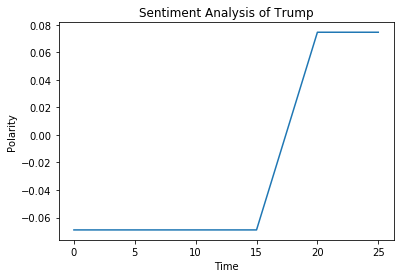

'Avg polarity-0.021115940203241795'

In [104]:
repeatedQuery(query, length)